In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import shap

In [ ]:
# Function to extract features
def extract_features(file_path, zip_file):
    with zip_file.open(file_path) as file:
        y, sr = librosa.load(file, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_DB = librosa.power_to_db(S, ref=np.max)
        return S_DB, sr, y

# Load and preprocess the data
zip_path = '/content/drive/MyDrive/Bird sound classification data/archive (1).zip'
metadata_path = '/content/drive/MyDrive/Bird sound classification data/bird_songs_metadata.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:
# Specific species extraction
species_of_interest = ['bewickii', 'polyglottos', 'migratorius', 'melodia', 'cardinalis']
metadata = metadata[metadata['species'].isin(species_of_interest)]

# Extracting features and labels
feature_list = []
labels = []

with zipfile.ZipFile(zip_path, 'r') as z:
    for index, row in metadata.iterrows():
        file_path = os.path.join('wavfiles', row['filename'])
        if file_path in z.namelist():
            S_DB, sr, y = extract_features(file_path, z)
            feature_list.append(np.mean(S_DB, axis=1))  # Mean over time
            labels.append(row['species'])

In [ ]:
# Prepare dataset
X_train, X_test, y_train, y_test = train_test_split(feature_list, labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier()

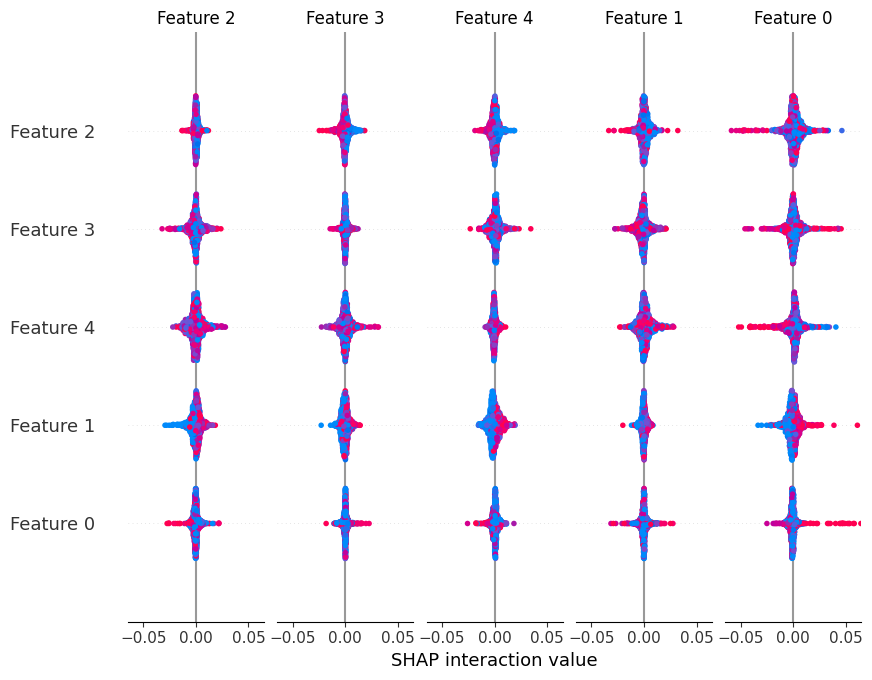

In [ ]:
# SHAP analysis
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP values
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.2 MB/s eta 0:00:00


<ipython-input-5-272da1ff03a4>:55: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=feature_idx, color='r', linestyle='--')


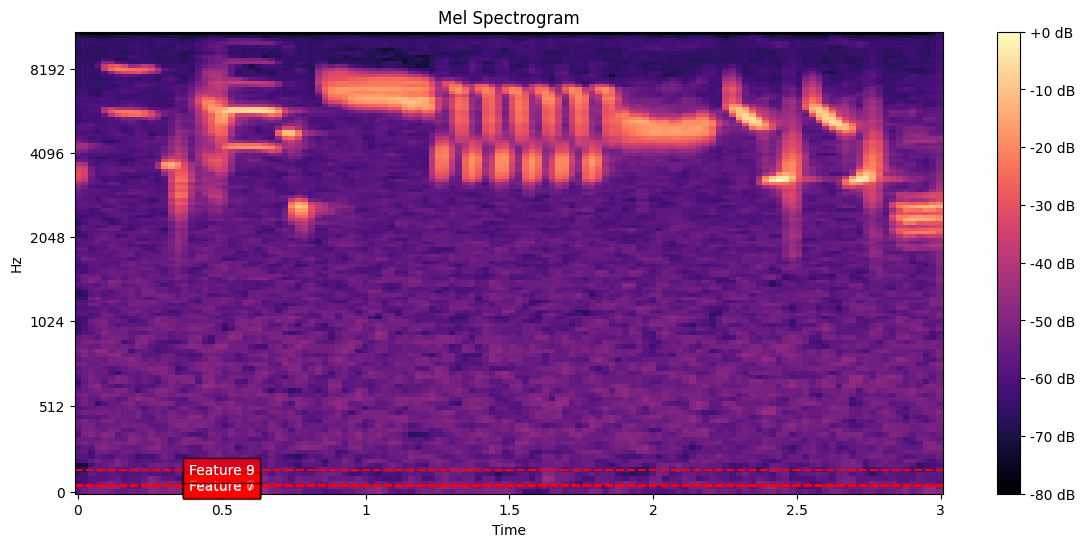

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import shap

# Load a sample file
sample_file_path = '/content/drive/MyDrive/Bird sound classification data/417877-4.wav'
y, sr = librosa.load(sample_file_path, sr=None)

# Calculate the mel spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
log_mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

# Plot the mel spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(log_mel_spect, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

# Define labels manually for the single file
labels = ['bewickii']

# Extract features for the single file
feature_list = [np.mean(log_mel_spect, axis=1)]  # Mean over time

# Standardize the feature list
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_list)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_scaled, y_encoded)

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_scaled)

# Get the mean absolute SHAP values for each feature
shap_values_abs = np.abs(shap_values).mean(axis=0)
top_n = 10  # Number of top features to highlight
top_sorted_indices = np.argsort(shap_values_abs)[-top_n:]

# Highlight the top features in the mel spectrogram
for i, feature_idx in enumerate(top_sorted_indices):
    plt.axhline(y=feature_idx, color='r', linestyle='--')
    plt.text(x=0.5, y=feature_idx, s=f'Feature {i}', color='white',
             ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))

plt.show()


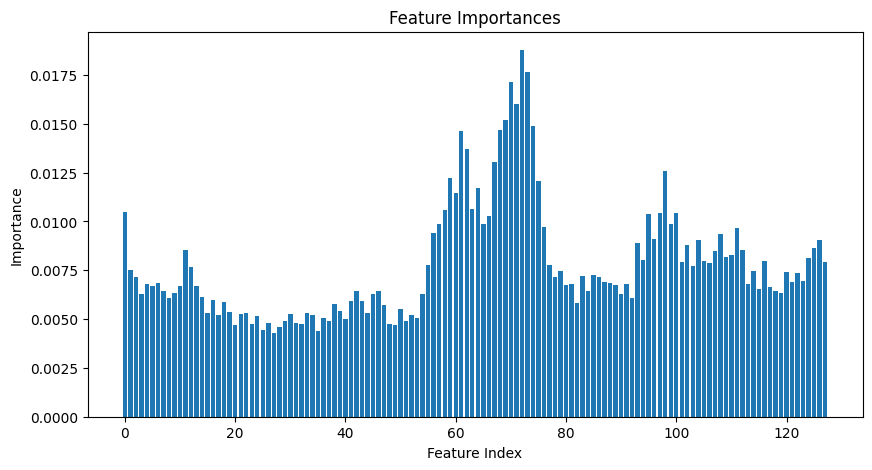

In [ ]:
# Plot feature importance
importances = rf.feature_importances_
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Classification report
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test_encoded, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       193
           1       0.84      0.81      0.83       204
           2       0.80      0.86      0.83       243
           3       0.88      0.94      0.91       207
           4       0.90      0.84      0.87       238

    accuracy                           0.86      1085
   macro avg       0.86      0.85      0.86      1085
weighted avg       0.86      0.86      0.86      1085



In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.6 MB/s eta 0:00:00
